# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

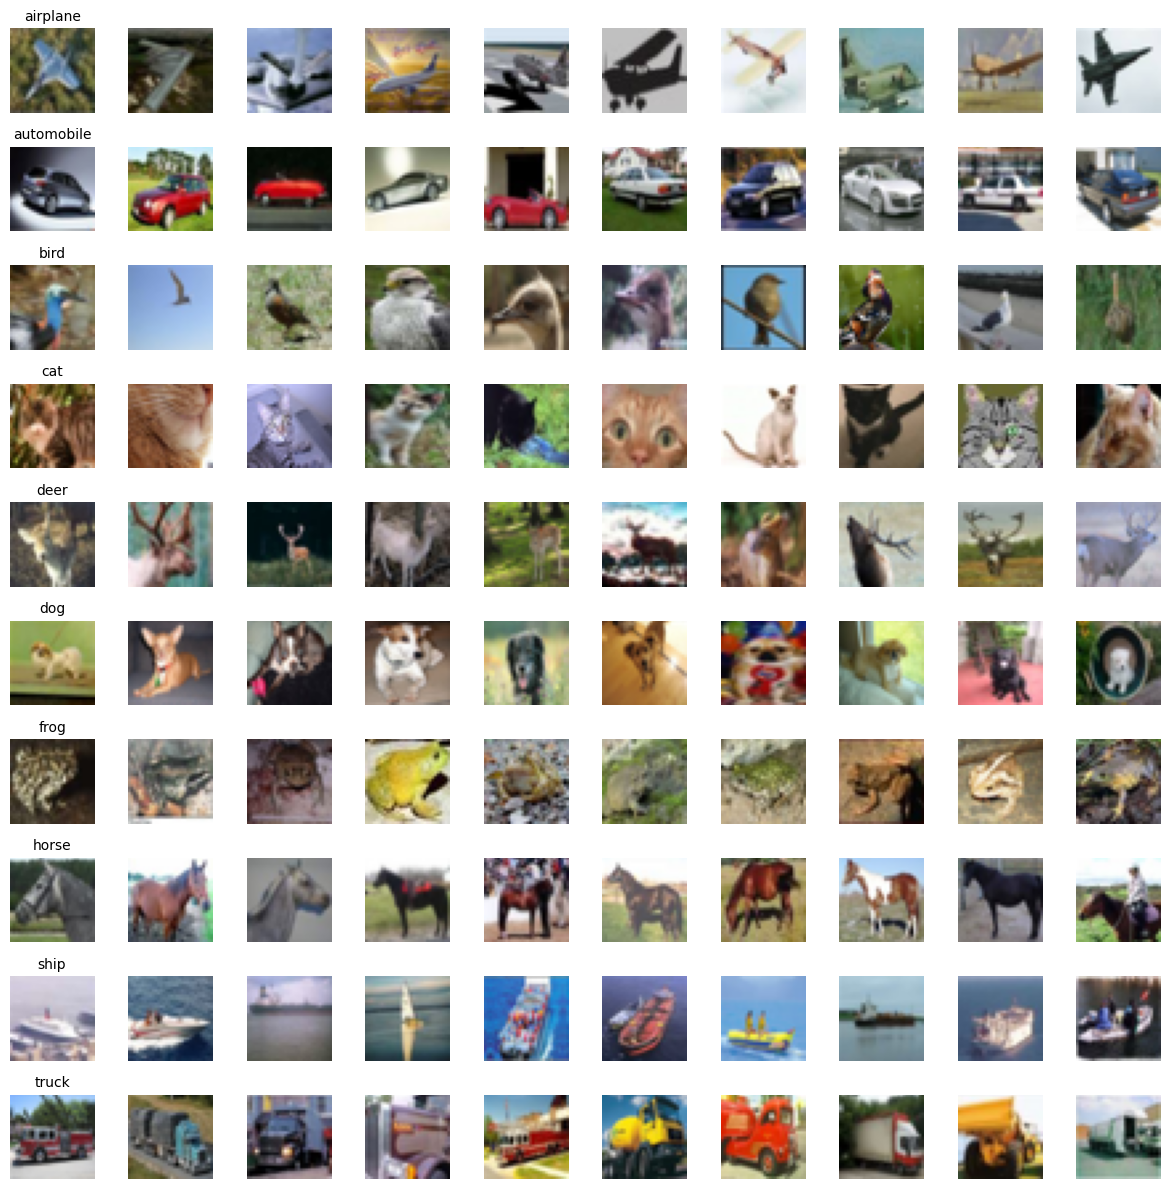

x_train_norm: (50000, 32, 32, 3) float32
y_train_cat: (50000, 10) float64


In [12]:
# 1) Class names (CIFAR-10 standard)
class_names = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

# 2) Plot 10x10 grid, 10 random images per class
rng = np.random.default_rng(42)

plt.figure(figsize=(12, 12))
for cls in range(10):
    idxs = np.where(y_train.reshape(-1) == cls)[0]
    chosen = rng.choice(idxs, size=10, replace=False)
    for j, idx in enumerate(chosen):
        ax = plt.subplot(10, 10, cls*10 + j + 1)
        plt.imshow(x_train[idx])
        plt.axis("off")
        if j == 0:
            ax.set_title(class_names[cls], fontsize=10)
plt.tight_layout()
plt.show()

# 3) One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

# 4) Normalize images to [0,1]
x_train_norm = x_train.astype("float32") / 255.0
x_test_norm  = x_test.astype("float32") / 255.0

print("x_train_norm:", x_train_norm.shape, x_train_norm.dtype)
print("y_train_cat:", y_train_cat.shape, y_train_cat.dtype)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [13]:
from keras.backend import clear_session
clear_session()

In [14]:
import tensorflow as tf
from tensorflow.keras import models, layers

model_1 = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

model_1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [15]:
from tensorflow.keras import optimizers

model_1.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=["accuracy"]
)

history_1 = model_1.fit(
    x_train_norm, y_train_cat,
    epochs=50,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.1989 - loss: 2.1628 - val_accuracy: 0.3401 - val_loss: 1.8701
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3643 - loss: 1.8253 - val_accuracy: 0.3895 - val_loss: 1.7291
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4123 - loss: 1.6681 - val_accuracy: 0.4356 - val_loss: 1.6043
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4520 - loss: 1.5518 - val_accuracy: 0.4625 - val_loss: 1.5014
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4906 - loss: 1.4415 - val_accuracy: 0.4928 - val_loss: 1.4418
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5191 - loss: 1.3601 - val_accuracy: 0.5274 - val_loss: 1.3371
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5467 - loss: 1.2969 - val_accuracy: 0.5313 - val_loss: 1.3187
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5640 - loss: 1.2382 - val_accuracy: 0.5512 - v

*   Plot the cross entropy loss curve and the accuracy curve

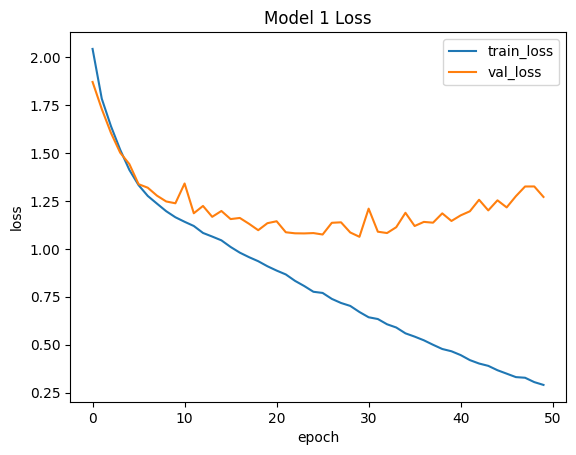

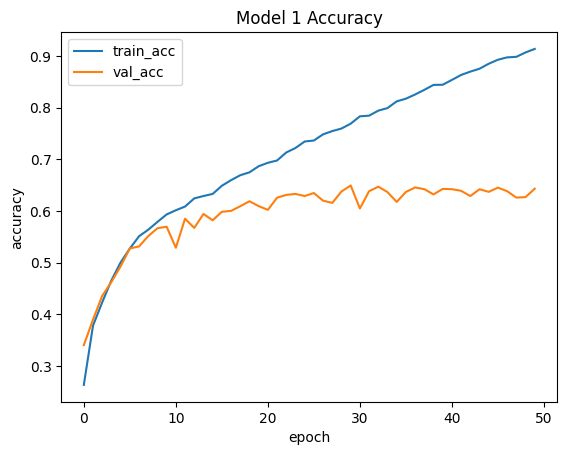

In [16]:
# Loss
plt.figure()
plt.plot(history_1.history["loss"], label="train_loss")
plt.plot(history_1.history["val_loss"], label="val_loss")
plt.title("Model 1 Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

# Accuracy
plt.figure()
plt.plot(history_1.history["accuracy"], label="train_acc")
plt.plot(history_1.history["val_accuracy"], label="val_acc")
plt.title("Model 1 Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [17]:
from keras.backend import clear_session
clear_session()

In [18]:
model_2 = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
    layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

model_2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [19]:
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=["accuracy"]
)

history_2 = model_2.fit(
    x_train_norm, y_train_cat,
    epochs=50,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.1753 - loss: 2.2088 - val_accuracy: 0.3403 - val_loss: 1.8739
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3639 - loss: 1.7979 - val_accuracy: 0.3967 - val_loss: 1.6882
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4336 - loss: 1.5982 - val_accuracy: 0.4573 - val_loss: 1.5370
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4813 - loss: 1.4449 - val_accuracy: 0.5073 - val_loss: 1.3788
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5187 - loss: 1.3538 - val_accuracy: 0.5160 - val_loss: 1.3631
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5448 - loss: 1.2729 - val_accuracy: 0.5648 - val_loss: 1.2427
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5843 - loss: 1.1853 - val_accuracy: 0.5658 - val_loss: 1.2224
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6073 - loss: 1.1121 - val_accuracy: 0.5736 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


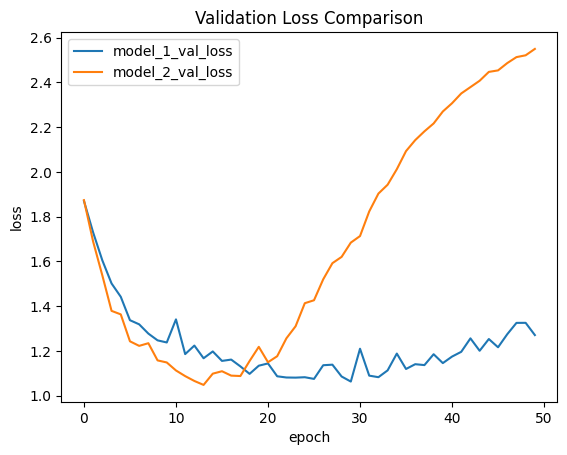

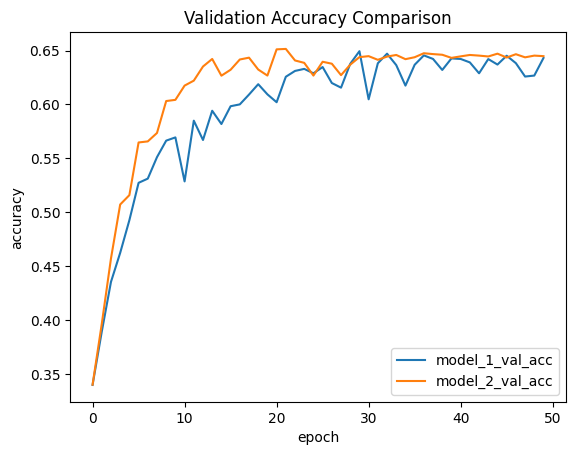

In [20]:
# Loss comparison
plt.figure()
plt.plot(history_1.history["val_loss"], label="model_1_val_loss")
plt.plot(history_2.history["val_loss"], label="model_2_val_loss")
plt.title("Validation Loss Comparison")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

# Accuracy comparison
plt.figure()
plt.plot(history_1.history["val_accuracy"], label="model_1_val_acc")
plt.plot(history_2.history["val_accuracy"], label="model_2_val_acc")
plt.title("Validation Accuracy Comparison")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


<Figure size 1000x1000 with 0 Axes>

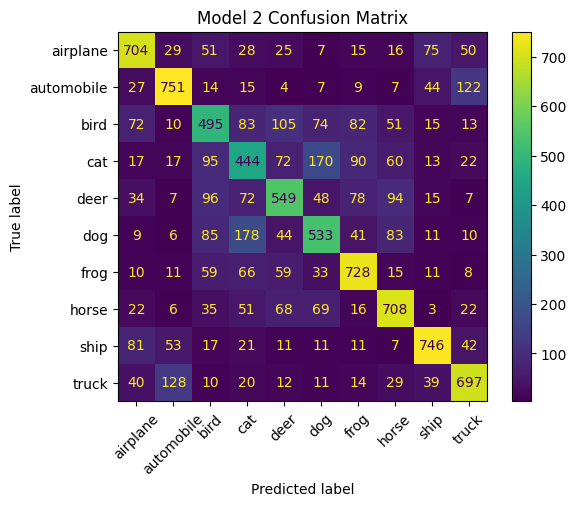

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class ids
y_pred_probs_2 = model_2.predict(x_test_norm, verbose=0)
y_pred_2 = np.argmax(y_pred_probs_2, axis=1)
y_true = y_test.reshape(-1)

cm = confusion_matrix(y_true, y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation=45)
plt.title("Model 2 Confusion Matrix")
plt.show()


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [22]:
test_loss_2, test_acc_2 = model_2.evaluate(x_test_norm, y_test_cat, verbose=0)
print("Model 2 test accuracy:", test_acc_2)
print("Model 2 test loss:", test_loss_2)


Model 2 test accuracy: 0.6355000138282776
Model 2 test loss: 2.542724132537842


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [23]:
from keras.backend import clear_session
clear_session()

In [24]:
# Resize images to 64x64
x_train_64 = tf.image.resize(x_train_norm, (64, 64)).numpy()
x_test_64  = tf.image.resize(x_test_norm, (64, 64)).numpy()

model_3 = models.Sequential([
    layers.Input(shape=(64, 64, 3)),

    # Block 1: 64 filters x2
    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D((2, 2)),

    # Block 2: 128 filters x2
    layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D((2, 2)),

    # Block 3: 256 filters x2
    layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
    layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

model_3.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 101s 777ms/step - accuracy: 0.1446 - loss: 2.2676 - val_accuracy: 0.3037 - val_loss: 1.9762
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 408ms/step - accuracy: 0.3023 - loss: 1.9393 - val_accuracy: 0.3026 - val_loss: 2.0348
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 31s 398ms/step - accuracy: 0.3451 - loss: 1.8532 - val_accuracy: 0.4380 - val_loss: 1.5473
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 406ms/step - accuracy: 0.4776 - loss: 1.4538 - val_accuracy: 0.4859 - val_loss: 1.4716
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 399ms/step - accuracy: 0.5229 - loss: 1.3380 - val_accuracy: 0.5410 - val_loss: 1.3321
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 403ms/step - accuracy: 0.5627 - loss: 1.2423 - val_accuracy: 0.5712 - val_loss: 1.2248
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 402ms/step - accuracy: 0.6092 - loss: 1.1107 - val_accuracy: 0.5907 - val_loss: 1.1719
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 407ms/step - accuracy: 0.6436 - loss: 1.0143 - val_acc

<Figure size 1000x1000 with 0 Axes>

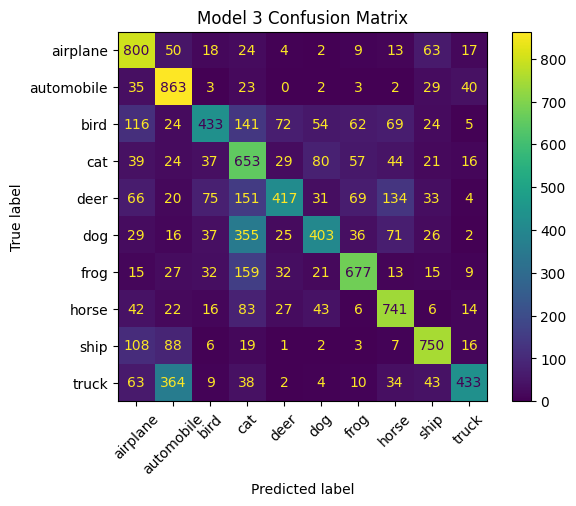

In [25]:
model_3.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=["accuracy"]
)

history_3 = model_3.fit(
    x_train_64, y_train_cat,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)

test_loss_3, test_acc_3 = model_3.evaluate(x_test_64, y_test_cat, verbose=0)
print("Model 3 test accuracy:", test_acc_3)
print("Model 3 test loss:", test_loss_3)

y_pred_probs_3 = model_3.predict(x_test_64, verbose=0)
y_pred_3 = np.argmax(y_pred_probs_3, axis=1)
cm3 = confusion_matrix(y_true, y_pred_3)

disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=class_names)
plt.figure(figsize=(10, 10))
disp3.plot(xticks_rotation=45)
plt.title("Model 3 Confusion Matrix")
plt.show()


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
